In [ ]:
"""
(4) Classificação com Árvores de Decisão

o Implemente uma árvore de decisão para classificar o conjunto de dados Titanic. Use a
métrica ROC-AUC para avaliar a performance do modelo
__________________________________________________________________________________________

(4) Classification with Decision Trees

Implement a decision tree to classify the Titanic dataset. Use the ROC-AUC metric
to evaluate the model's performance.

"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
# Entering the data for training
titanic_train_data = pd.read_csv("titanic-train.csv", encoding="utf-8")
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Getting info about the training dataset
print(titanic_train_data.info())
print("\n")
titanic_train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None




(891, 12)

In [ ]:
# Entering the data for testing
titanic_test_data = pd.read_csv("titanic-test.csv", encoding="utf-8")
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Getting info about the test dataset
print(titanic_test_data.info())
print("\n")
titanic_test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None




(418, 11)

In [ ]:
# Defining the classification column
classification_feature = titanic_train_data["Survived"]

# Defining the columns that are studied to make the classification
study_features = ["Pclass", "Sex", "SibSp", "Parch"]

# Converting categorical values to numeric values
x_train = pd.get_dummies(titanic_train_data[study_features])
x_test = pd.get_dummies(titanic_test_data[study_features])

In [ ]:
# Splitting the training set into training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, classification_feature, test_size=0.2, random_state=1)

In [ ]:
# Initializing the Decision Tree algorithm and training the model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Making predictions on the validation set
y_val_pred_prob = model.predict_proba(x_val)[:, 1]

In [ ]:
# MEASURING ROC-AUC SCORE
roc_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"ROC-AUC Score:")
print(roc_auc)

ROC-AUC Score:
0.8243086068751615


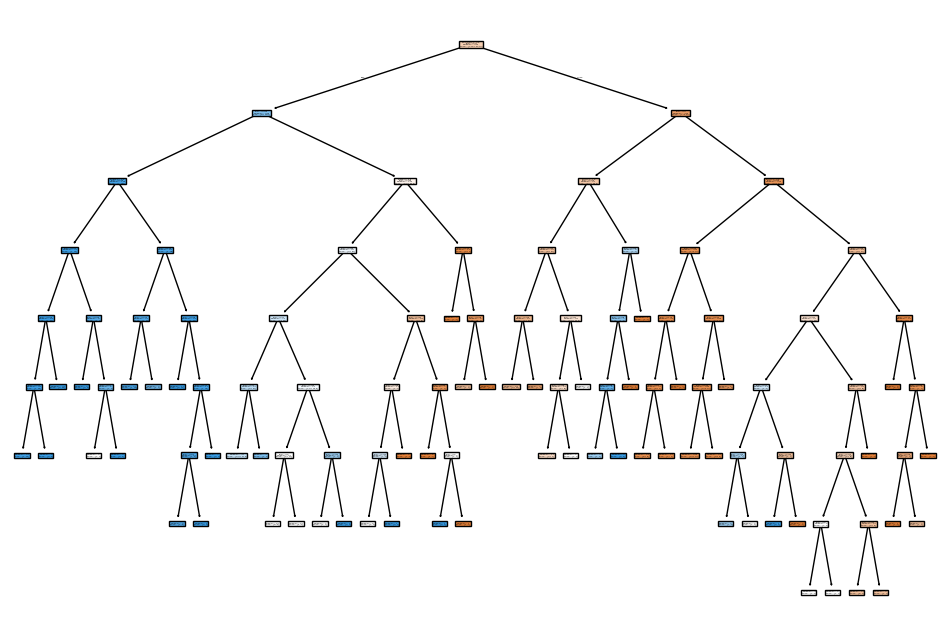

In [ ]:
# Plotting the image of the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=x_train.columns)
plt.show()